### Visualization
---

In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

### Feature Dim = 300
---

### MR-lstm
---

In [44]:
dataset = 'mr'
model = 'lstm'
with open('./doc_embeddings/{}_{}_doc_vectors.txt'.format(dataset, model), 'r') as f:
    doc_embed = f.readlines()

In [45]:
X = []
for s in doc_embed:
    X.append(s.split())

In [46]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(len(X[0])-2) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (3554, 202)


In [47]:
df_test = df[df.doc_id.str.contains('test')]

In [48]:
df_test.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_190,embed_dim_191,embed_dim_192,embed_dim_193,embed_dim_194,embed_dim_195,embed_dim_196,embed_dim_197,embed_dim_198,embed_dim_199
0,doc_test_id_0,0,-0.503553,-2.148272,-0.826391,-1.940238,-0.565785,-1.061632,-1.053670,0.272403,...,-0.302937,-0.839405,-1.790406,-0.049376,0.629124,-0.901649,-0.358391,-0.140946,0.331493,-1.857937
1,doc_test_id_1,0,-0.334034,-1.689941,-0.167097,-1.209154,-1.007174,-1.188893,-1.131352,0.858600,...,-1.017019,-0.723537,-1.382647,0.150315,0.456832,-0.987327,-0.306319,0.864872,-0.851255,-1.230250
2,doc_test_id_2,0,-0.722682,-1.295374,-0.377315,-0.969158,0.496099,0.039942,-0.799195,2.169761,...,-0.311187,-1.344429,-0.855438,0.095494,1.384168,-0.108962,0.367400,-0.134017,-0.694303,-0.757230
3,doc_test_id_3,1,1.690405,-0.962884,1.211417,-0.675534,0.322355,-0.005281,0.914041,0.374508,...,-0.904657,-1.353066,-0.405238,0.241427,-0.101147,1.664033,-0.848284,-0.077956,-0.140766,-0.421348
4,doc_test_id_4,0,2.046671,-0.710064,0.884704,0.821010,-0.405416,-0.159681,-0.449561,-0.274819,...,-0.153558,-1.363278,-0.062650,1.527187,-0.951672,0.511679,1.876528,-0.742400,0.249055,-0.189964


In [49]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [50]:
df.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_190,embed_dim_191,embed_dim_192,embed_dim_193,embed_dim_194,embed_dim_195,embed_dim_196,embed_dim_197,embed_dim_198,embed_dim_199
0,doc_test_id_0,0,-0.503553,-2.148272,-0.826391,-1.940238,-0.565785,-1.061632,-1.053670,0.272403,...,-0.302937,-0.839405,-1.790406,-0.049376,0.629124,-0.901649,-0.358391,-0.140946,0.331493,-1.857937
1,doc_test_id_1,0,-0.334034,-1.689941,-0.167097,-1.209154,-1.007174,-1.188893,-1.131352,0.858600,...,-1.017019,-0.723537,-1.382647,0.150315,0.456832,-0.987327,-0.306319,0.864872,-0.851255,-1.230250
2,doc_test_id_2,0,-0.722682,-1.295374,-0.377315,-0.969158,0.496099,0.039942,-0.799195,2.169761,...,-0.311187,-1.344429,-0.855438,0.095494,1.384168,-0.108962,0.367400,-0.134017,-0.694303,-0.757230
3,doc_test_id_3,1,1.690405,-0.962884,1.211417,-0.675534,0.322355,-0.005281,0.914041,0.374508,...,-0.904657,-1.353066,-0.405238,0.241427,-0.101147,1.664033,-0.848284,-0.077956,-0.140766,-0.421348
4,doc_test_id_4,0,2.046671,-0.710064,0.884704,0.821010,-0.405416,-0.159681,-0.449561,-0.274819,...,-0.153558,-1.363278,-0.062650,1.527187,-0.951672,0.511679,1.876528,-0.742400,0.249055,-0.189964


In [51]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [52]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28400612 0.07731492 0.05156231]


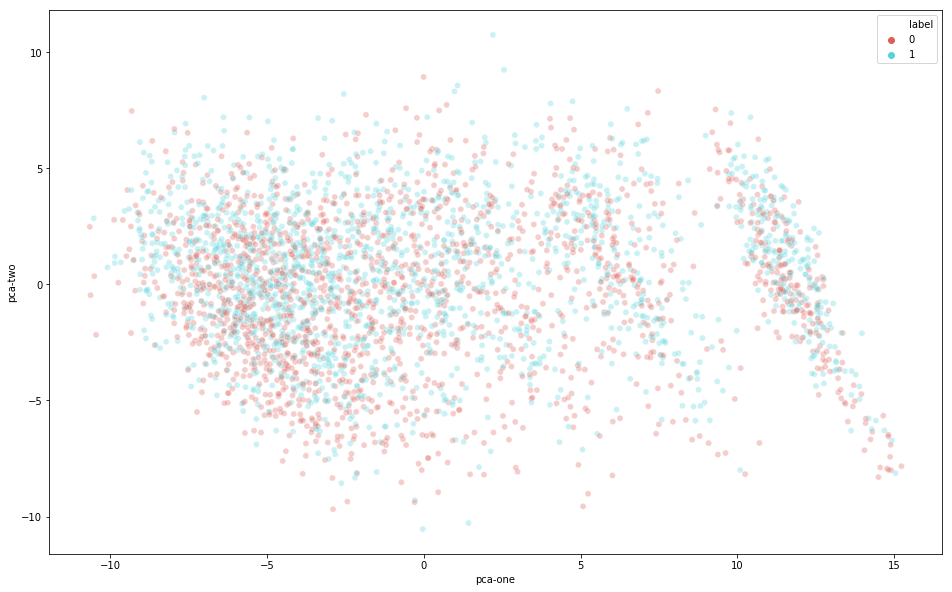

In [53]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

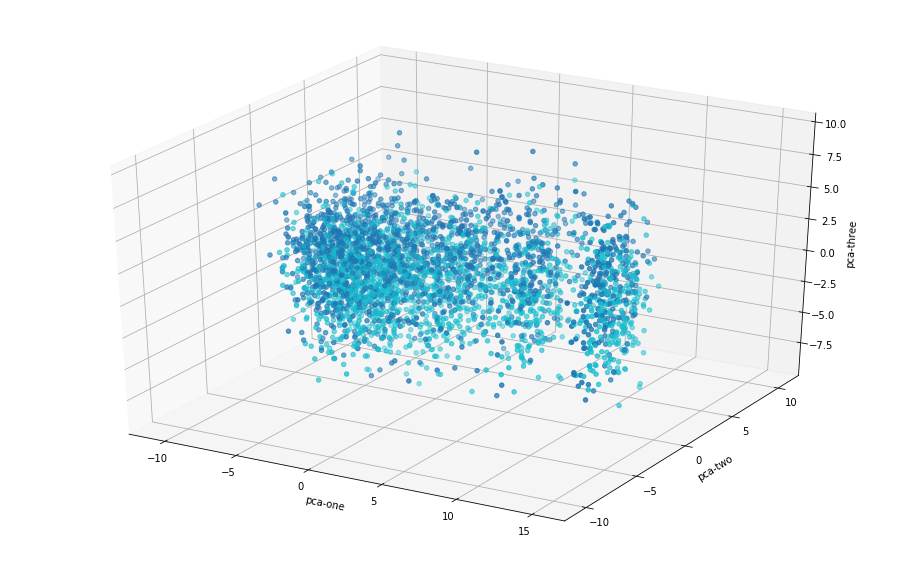

In [54]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [63]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3554 samples in 0.025s...
[t-SNE] Computed neighbors for 3554 samples in 5.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3554
[t-SNE] Computed conditional probabilities for sample 2000 / 3554
[t-SNE] Computed conditional probabilities for sample 3000 / 3554
[t-SNE] Computed conditional probabilities for sample 3554 / 3554
[t-SNE] Mean sigma: 2.703241
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.268921
[t-SNE] KL divergence after 300 iterations: 2.801419


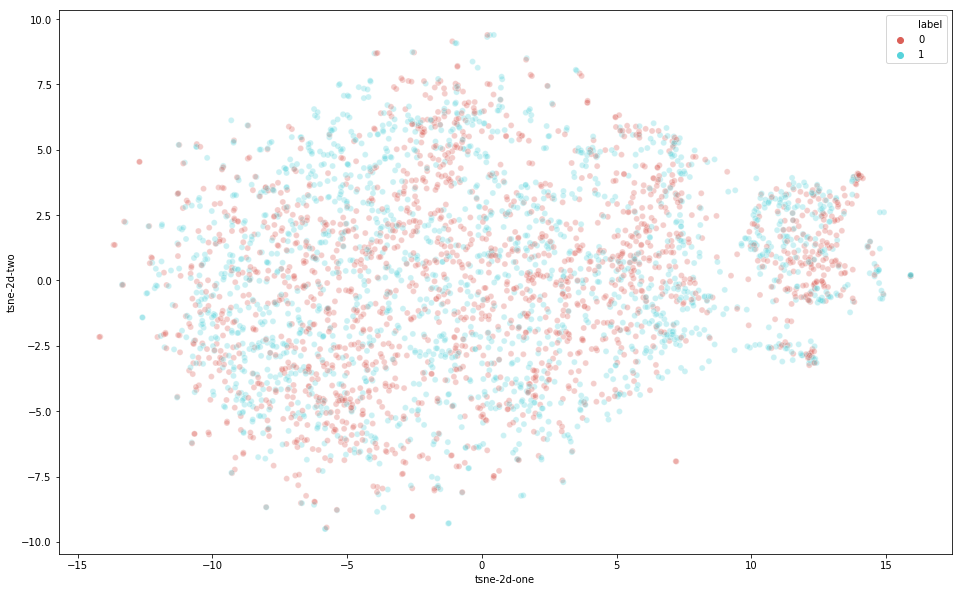

In [64]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset2 = df_subset#[df_subset['tsne-2d-two']]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset2.label.nunique()),
    data=df_subset2,
    legend="full",
    alpha=0.3
)

#### Combined

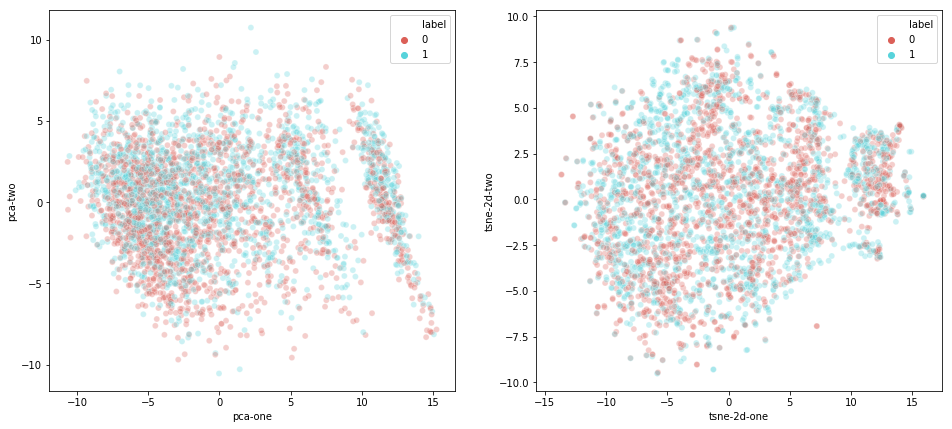

In [15]:
n_class = df_subset2.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### MR-transformer
---

In [16]:
dataset = 'mr'
model = 'transformer'
with open('./doc_embeddings/{}_{}_doc_vectors.txt'.format(dataset, model), 'r') as f:
    doc_embed = f.readlines()

In [17]:
X = []
for s in doc_embed:
    X.append(s.split())

In [18]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(len(X[0])-2) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (3554, 302)


In [19]:
df_test = df[df.doc_id.str.contains('test')]

In [20]:
df_test.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_290,embed_dim_291,embed_dim_292,embed_dim_293,embed_dim_294,embed_dim_295,embed_dim_296,embed_dim_297,embed_dim_298,embed_dim_299
0,doc_test_id_0,0,1.796623,3.740527,1.360466,1.427031,1.773068,1.143015,1.656802,1.992267,...,1.909222,2.095036,1.854138,1.829895,0.922760,1.118756,2.217727,0.633627,0.898510,1.674938
1,doc_test_id_1,0,1.126914,3.038093,1.664451,1.664858,0.870825,1.900610,2.816615,2.345810,...,1.906959,2.202482,0.986498,1.252384,0.993435,0.969020,1.652919,0.751138,1.635507,2.089125
2,doc_test_id_2,0,1.769095,2.140986,1.499116,0.967791,1.373233,2.673125,1.678048,2.373530,...,1.906940,2.265550,2.441701,1.251227,1.440968,0.795251,1.313825,1.346816,1.528492,1.789937
3,doc_test_id_3,1,1.774487,2.591003,1.074769,1.549806,1.233208,0.985047,1.671362,2.313359,...,1.908538,2.534736,2.103681,1.250004,0.925136,0.760539,0.988202,0.569422,1.675869,2.092096
4,doc_test_id_4,0,2.066409,2.618315,1.288102,2.287483,1.377088,1.132069,1.655939,2.007350,...,1.910266,0.974807,1.233516,1.806001,1.319569,0.282810,1.331142,1.441344,2.270000,1.959448


In [21]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [22]:
df.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_290,embed_dim_291,embed_dim_292,embed_dim_293,embed_dim_294,embed_dim_295,embed_dim_296,embed_dim_297,embed_dim_298,embed_dim_299
0,doc_test_id_0,0,1.796623,3.740527,1.360466,1.427031,1.773068,1.143015,1.656802,1.992267,...,1.909222,2.095036,1.854138,1.829895,0.922760,1.118756,2.217727,0.633627,0.898510,1.674938
1,doc_test_id_1,0,1.126914,3.038093,1.664451,1.664858,0.870825,1.900610,2.816615,2.345810,...,1.906959,2.202482,0.986498,1.252384,0.993435,0.969020,1.652919,0.751138,1.635507,2.089125
2,doc_test_id_2,0,1.769095,2.140986,1.499116,0.967791,1.373233,2.673125,1.678048,2.373530,...,1.906940,2.265550,2.441701,1.251227,1.440968,0.795251,1.313825,1.346816,1.528492,1.789937
3,doc_test_id_3,1,1.774487,2.591003,1.074769,1.549806,1.233208,0.985047,1.671362,2.313359,...,1.908538,2.534736,2.103681,1.250004,0.925136,0.760539,0.988202,0.569422,1.675869,2.092096
4,doc_test_id_4,0,2.066409,2.618315,1.288102,2.287483,1.377088,1.132069,1.655939,2.007350,...,1.910266,0.974807,1.233516,1.806001,1.319569,0.282810,1.331142,1.441344,2.270000,1.959448


In [23]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [24]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.14486664 0.02185813 0.01927568]


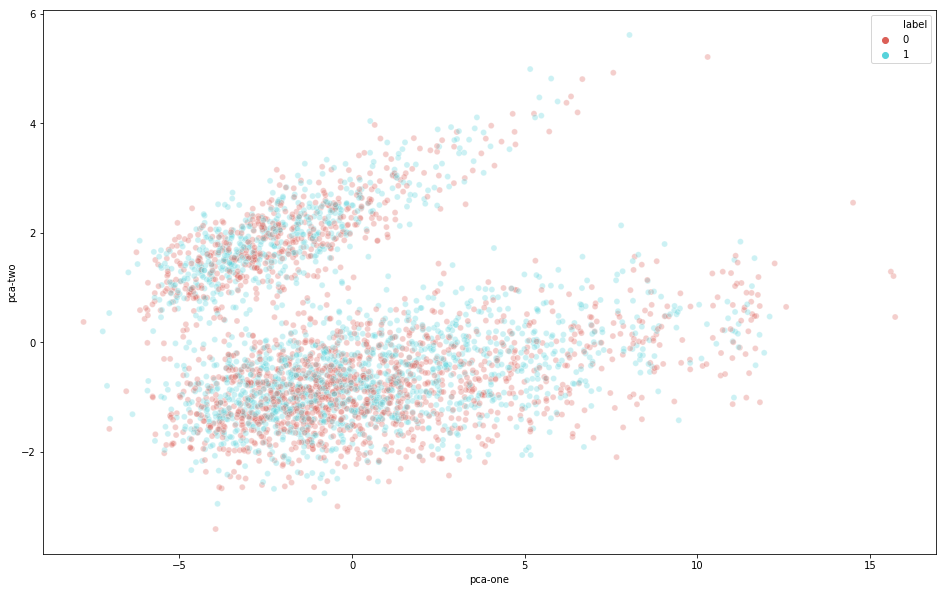

In [25]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

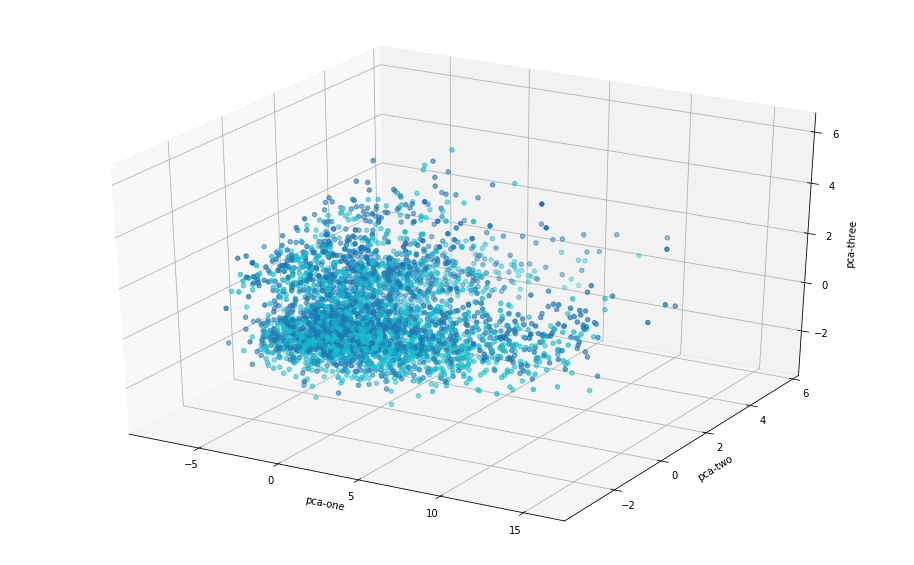

In [26]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [27]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3554 samples in 0.035s...
[t-SNE] Computed neighbors for 3554 samples in 6.409s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3554
[t-SNE] Computed conditional probabilities for sample 2000 / 3554
[t-SNE] Computed conditional probabilities for sample 3000 / 3554
[t-SNE] Computed conditional probabilities for sample 3554 / 3554
[t-SNE] Mean sigma: 1.932791
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.767715
[t-SNE] KL divergence after 300 iterations: 3.173357


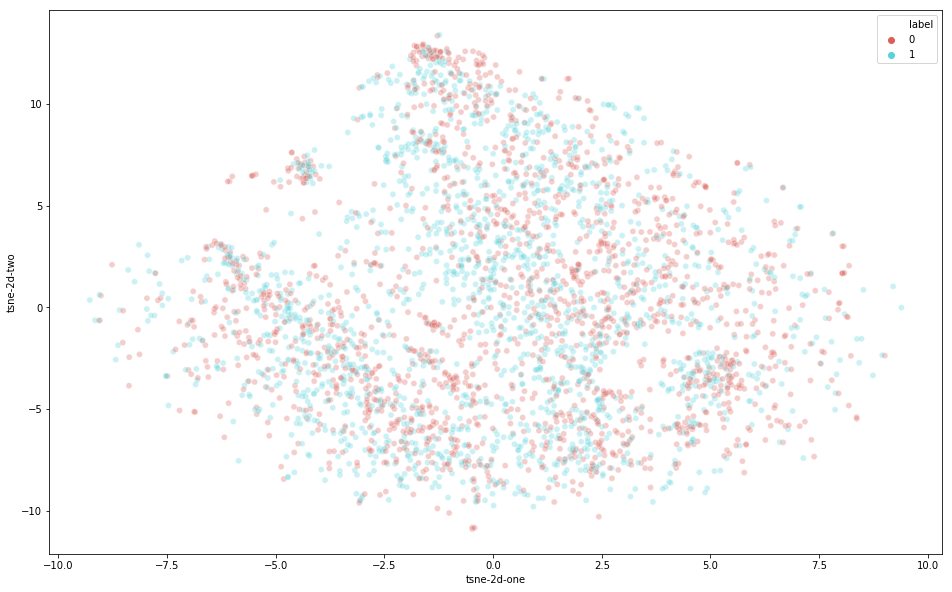

In [28]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset2 = df_subset # [df_subset['tsne-2d-two'] < 15]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset2.label.nunique()),
    data=df_subset2,
    legend="full",
    alpha=0.3
)

#### Combined

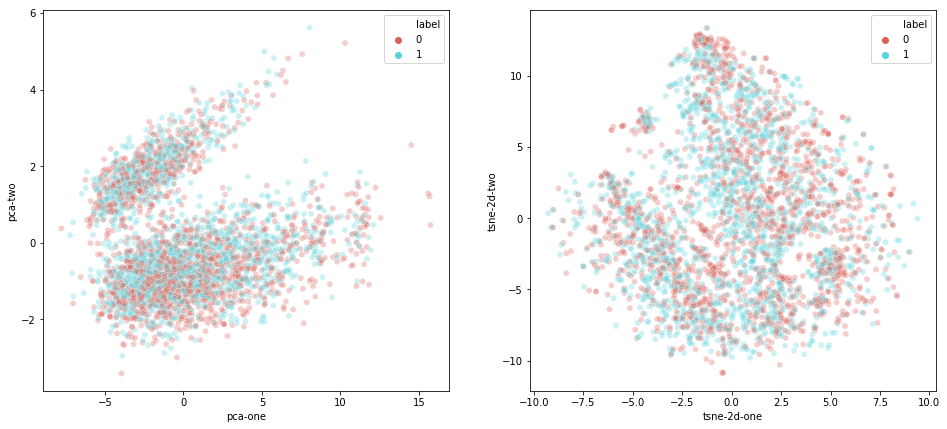

In [29]:
n_class = df_subset2.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### MR-ddcnn
---

In [30]:
dataset = 'mr'
model = 'ddcnn'
with open('./doc_embeddings/{}_{}_doc_vectors.txt'.format(dataset, model), 'r') as f:
    doc_embed = f.readlines()

In [31]:
X = []
for s in doc_embed:
    X.append(s.split())

In [32]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(len(X[0])-2) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (3554, 602)


In [33]:
df_test = df[df.doc_id.str.contains('test')]

In [34]:
df_test.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_590,embed_dim_591,embed_dim_592,embed_dim_593,embed_dim_594,embed_dim_595,embed_dim_596,embed_dim_597,embed_dim_598,embed_dim_599
0,doc_test_id_0,0,0.077241,0.486986,1.440326,-0.611657,0.361070,0.439728,-0.059268,0.064322,...,0.013744,-0.729444,1.421061,-1.230411,-2.108638,-0.104070,0.157093,-0.978012,0.366117,0.172924
1,doc_test_id_1,0,-0.343163,0.335963,-0.307291,0.145579,0.056710,-0.493475,0.707745,-0.673760,...,-1.049265,-0.286791,-0.632676,-0.112609,0.709967,-0.472870,0.189134,-1.478610,0.425206,-0.888549
2,doc_test_id_2,0,0.770496,0.126158,0.429359,-0.759987,-0.430334,0.149916,-0.360780,0.790841,...,-0.805845,-0.641500,-0.660596,0.374873,-1.808905,1.147825,-1.037491,-0.414301,0.078348,0.183915
3,doc_test_id_3,1,0.298148,0.732540,0.584564,-1.083041,0.286099,-0.125746,0.156257,0.771578,...,0.179756,1.830178,-1.268552,0.612779,-0.593518,-0.227202,-1.034382,0.925229,0.318713,0.875740
4,doc_test_id_4,0,-0.625808,0.033631,1.088413,0.296927,-0.006145,2.084197,-0.156336,-0.529597,...,-1.395225,1.342363,-1.423723,-1.348634,-0.830773,2.833074,-0.359832,-0.105556,-0.265125,-0.207541


In [35]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [36]:
df.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_590,embed_dim_591,embed_dim_592,embed_dim_593,embed_dim_594,embed_dim_595,embed_dim_596,embed_dim_597,embed_dim_598,embed_dim_599
0,doc_test_id_0,0,0.077241,0.486986,1.440326,-0.611657,0.361070,0.439728,-0.059268,0.064322,...,0.013744,-0.729444,1.421061,-1.230411,-2.108638,-0.104070,0.157093,-0.978012,0.366117,0.172924
1,doc_test_id_1,0,-0.343163,0.335963,-0.307291,0.145579,0.056710,-0.493475,0.707745,-0.673760,...,-1.049265,-0.286791,-0.632676,-0.112609,0.709967,-0.472870,0.189134,-1.478610,0.425206,-0.888549
2,doc_test_id_2,0,0.770496,0.126158,0.429359,-0.759987,-0.430334,0.149916,-0.360780,0.790841,...,-0.805845,-0.641500,-0.660596,0.374873,-1.808905,1.147825,-1.037491,-0.414301,0.078348,0.183915
3,doc_test_id_3,1,0.298148,0.732540,0.584564,-1.083041,0.286099,-0.125746,0.156257,0.771578,...,0.179756,1.830178,-1.268552,0.612779,-0.593518,-0.227202,-1.034382,0.925229,0.318713,0.875740
4,doc_test_id_4,0,-0.625808,0.033631,1.088413,0.296927,-0.006145,2.084197,-0.156336,-0.529597,...,-1.395225,1.342363,-1.423723,-1.348634,-0.830773,2.833074,-0.359832,-0.105556,-0.265125,-0.207541


In [37]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [38]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.2508827  0.07755489 0.01778049]


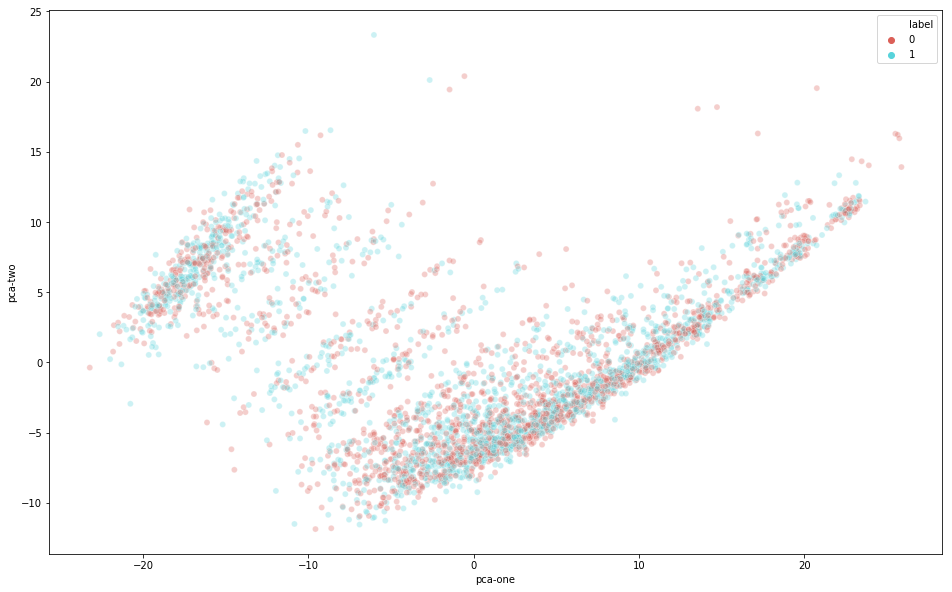

In [39]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

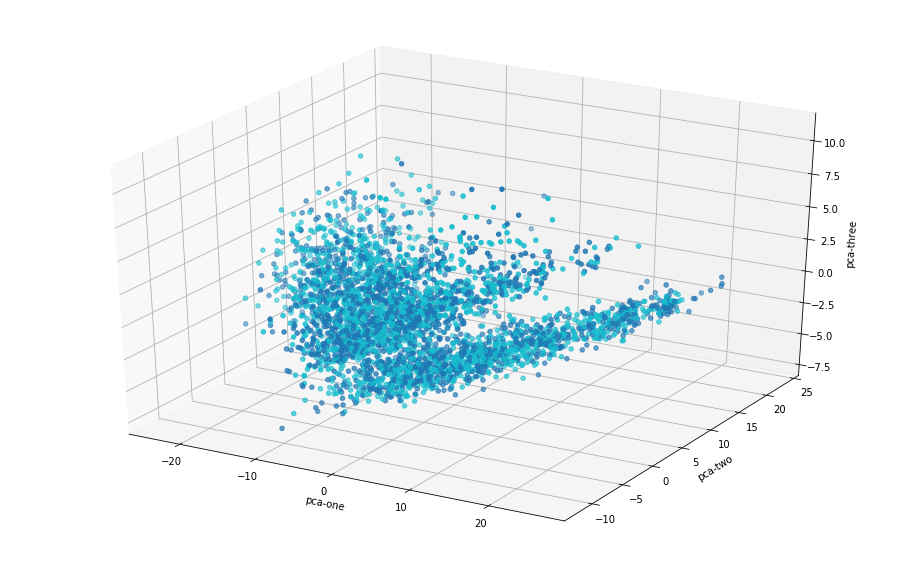

In [40]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [41]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3554 samples in 0.060s...
[t-SNE] Computed neighbors for 3554 samples in 12.863s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3554
[t-SNE] Computed conditional probabilities for sample 2000 / 3554
[t-SNE] Computed conditional probabilities for sample 3000 / 3554
[t-SNE] Computed conditional probabilities for sample 3554 / 3554
[t-SNE] Mean sigma: 3.692055
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.683884
[t-SNE] KL divergence after 300 iterations: 2.583815


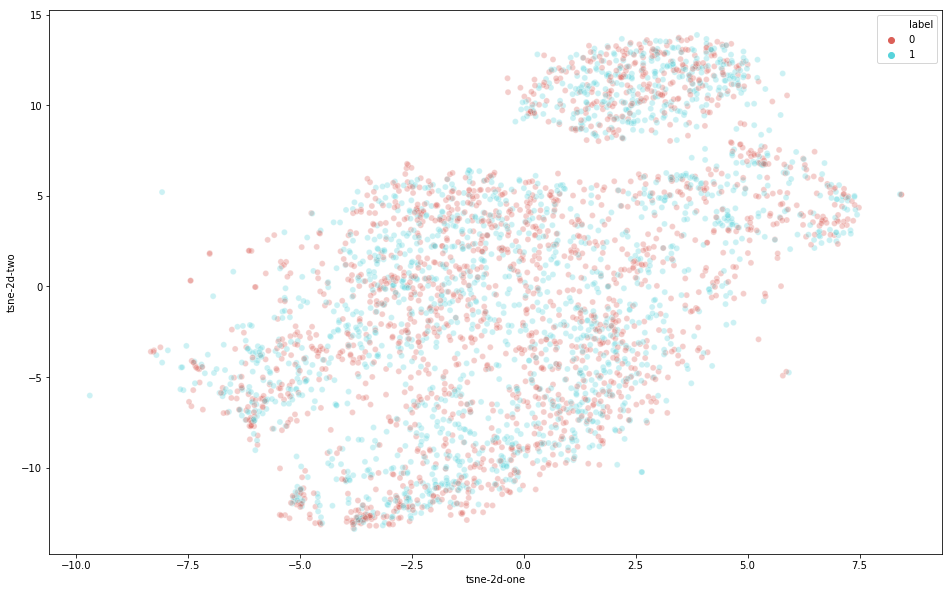

In [42]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset2 = df_subset # [df_subset['tsne-2d-two'] < 15]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset2.label.nunique()),
    data=df_subset2,
    legend="full",
    alpha=0.3
)

#### Combined

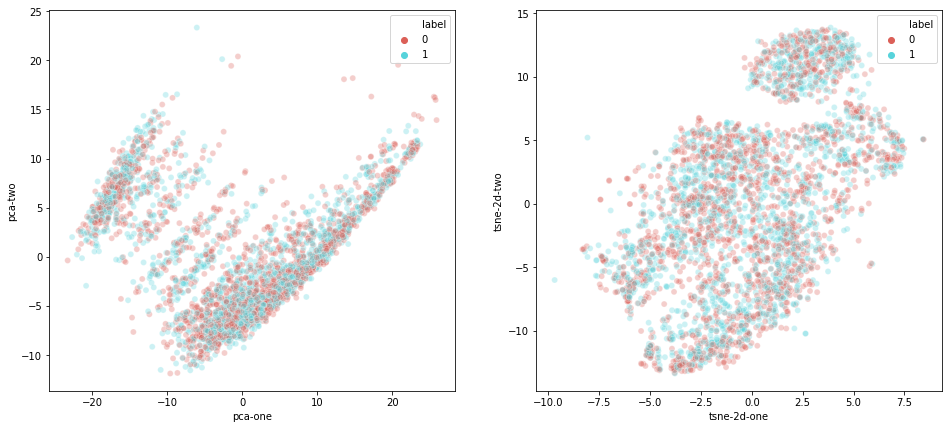

In [43]:
n_class = df_subset2.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax2
)